# Damage Monitoring Tools

The damage monitoring toolkit consists the files `SectionLib.py` and `get_fibers.py`, and the Python package `opensees`. Currently these files have to be copied to the location from where they are executed, and the `opensees` package should be installed by running the following command:

```shell
pip install opensees
```

The toolkit can be used from either Tcl, Python, or directly at the command line.

The following example shows how the `get_fibers.py` module may be invoked from Tcl:

```tcl
proc py {args} {
    eval "[exec python.exe {*}$args]"
}

foreach ds {dsr1 dsr2 dsr3} {
    py get_fibers.py model.json record-${ds}.txt -e 4020,3020 -d 60 -s $ds
}
```

> Note: This currently requires the `get_fibers.py` file to be visible from the current working directory
of the Tcl interpreter.

### 1) Geometry building

Damage regions are built from the same plane geometry primitives that are offered by OpenSees (e.g. the `patch` and `layer` commands).

Additionally, the function `section` from the module `opensees.render.mpl` can be used to visualize components.

In [1]:
from opensees import patch, layer, section
import opensees.render.mpl as render

scatter() missing 2 required positional arguments: 'x' and 'y'
not enough values to unpack (expected 2, got 0)


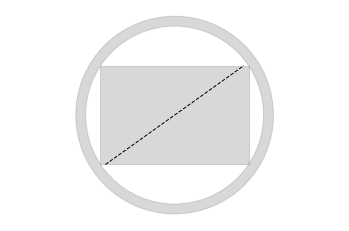

In [3]:
s = section.FiberSection(
    areas = [
        patch.circ(extRad=20, intRad=18),
        layer.line(vertices=[[-14, -10], [14, 10]]),
        patch.rect(corners=[[-15, -10], [15, 10]])
    ]
)
render.section(s);

Print section properties:

In [4]:
print(s.area)
print(s.ixc)
print(s.iyc)
# print(s.ixc)

838.7610416728243


ZeroDivisionError: division by zero

Additionally, the `SectionLib` module provides convenient wrappers for building  complex sections. 

The `Octagon` function from this library can be called in 3 ways:

- `ConfinedPolygon(radius)` Constructs an octagon.
- `PolygonRing(extRad, intRad, n)` Constructs an `n`-gon annulus
<!-- - `Octagon(extRad, extRad)` (ie when both arguments are equal) Constructs an octagonal boundary line. -->

In [5]:
from opensees.section import ConfinedPolygon

not enough values to unpack (expected 2, got 0)


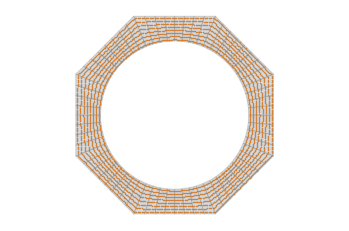

In [6]:
render.section(section.ConfiningPolygon(8, 20, 15, s=8));

not enough values to unpack (expected 2, got 0)


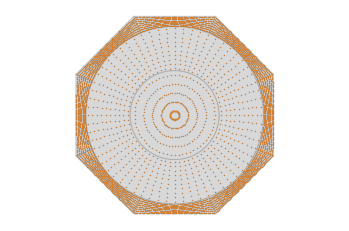

In [7]:
render.section(section.ConfinedPolygon(8, 20, s=8));

not enough values to unpack (expected 2, got 0)


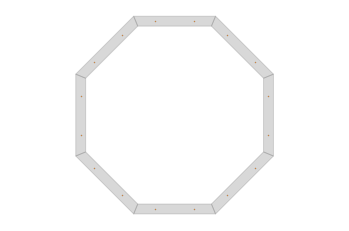

In [8]:
render.section(section.PolygonRing(8, 20, 18));

scatter() missing 2 required positional arguments: 'x' and 'y'
not enough values to unpack (expected 2, got 0)


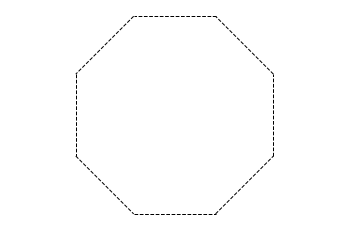

In [9]:
render.section(section.ConfinedPolygon(8, 20, 20));

### 2) Define damage state regions; the `get_fibers` module

In [10]:
from fiberRecorders import iter_elem_fibers, damage_states, read_sect_xml

The `get_fibers` module provides the helper function `iter_elem_fibers` for iterating
over a filtered collection of fibers. Fibers are filtered out by supplying a *damage state* dictionary with a required `"regions"` field, and optional `"material"` field.

In [11]:
from opensees.units.english import ft, inch

In [12]:
Dcol = 7*ft
Rcol = Dcol/2
cover = 2*inch

In [13]:
DS = damage_states(Dcol)

### 3) Iterating over fibers

In [14]:
import json
import numpy as np

In [15]:
model_file = "modelDetails.json"
elements = [4010]

In [17]:
import json

with open(model_file, "r") as f:
    model = json.load(f)

If the third argument to `iter_elem_fibers` is omitted, all fibers are returned (Underscores are used in the following cell to name unused variables).

In [18]:
all_fibers = [
#   { element   | Domain    and   predicate                  }
    f["coord"] for _,__,f in iter_elem_fibers(model, elements)
]

ds1_fibers = np.array([
    f["coord"] for e,s,f in iter_elem_fibers(model, elements, filt=DS["dsr1"], sections=[0])
])

ds2_fibers = np.array([
    f["coord"] for e,s,f in iter_elem_fibers(model, elements, filt=DS["dsr2"], sections=[0])
])

ds3_fibers = np.array([
    f["coord"] for e,s,f in iter_elem_fibers(model, elements, filt=DS["dsr3"], sections=[0])
])

ds4_fibers = np.array([
    f["coord"] for e,s,f in iter_elem_fibers(model, elements, filt=DS["dsr3"], sections=[0])
])



## 3) Visualizing

not enough values to unpack (expected 2, got 0)
scatter() missing 2 required positional arguments: 'x' and 'y'
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
scatter() missing 2 required positional arguments: 'x' and 'y'
not enough values to unpack (expected 2, got 0)


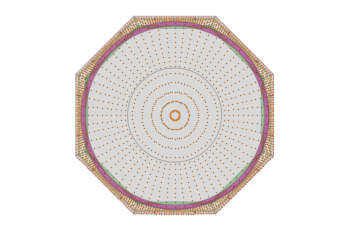

In [19]:
sect = section.ConfinedPolygon(8, Dcol/2)
ax = render.section(sect)
render.section(DS["dsr1"]["regions"][0], facecolor="b", ax=ax)
render.section(DS["dsr2"]["regions"][0], facecolor="pink", ax=ax)
render.section(DS["dsr3"]["regions"][0], facecolor="y", ax=ax)
render.section(DS["dsr4"]["regions"][0], facecolor="g", ax=ax);
render.section(DS["dsr5"]["regions"][0], facecolor="r", ax=ax);
# ax.set_xlim([0, Rcol+1])
# ax.set_ylim([-1, Rcol+1])

not enough values to unpack (expected 2, got 0)
scatter() missing 2 required positional arguments: 'x' and 'y'
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
scatter() missing 2 required positional arguments: 'x' and 'y'
not enough values to unpack (expected 2, got 0)


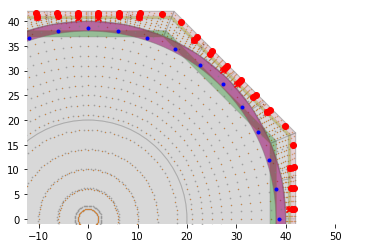

In [20]:
# Create grid of points
import numpy as np

# Create plot axis and add sections to it
ax = render.section(sect)
render.section(DS["dsr1"]["regions"][0], facecolor="b", ax=ax)
render.section(DS["dsr2"]["regions"][0], facecolor="pink", ax=ax)
render.section(DS["dsr3"]["regions"][0], facecolor="y", ax=ax)
render.section(DS["dsr4"]["regions"][0], facecolor="g", ax=ax);
render.section(DS["dsr5"]["regions"][0], facecolor="r", ax=ax);

# add filtered fibers to plot
ax.scatter(*list(zip(*all_fibers)), color="grey", alpha=0.3, s=0.5);
ax.scatter(*list(zip(*ds1_fibers)), marker=".", color="blue")
ax.scatter(*list(zip(*ds2_fibers)), color="r", marker="o")#, s=0.8)
ax.scatter(*list(zip(*ds3_fibers)), color="r", marker="x")#,  s=1)
ax.scatter(*list(zip(*ds4_fibers)), color="r", marker="+")#,  s=1)

# Set plot limits
ax.set_xlim([ 0, Rcol+1])
ax.set_ylim([-1, Rcol+1])
ax.axis("on");

In [ ]:
ax = render.section(sect)
ax.scatter(*list(zip(*all_fibers)), color="red", s=0.5);

In [ ]:
ax = render.section(sect)
ax.scatter(
    *np.array([f.coord for f in sect.fibers if hasattr(f,"coord")]).T, s=0.1
);

In [21]:
def fiber_strain(recorder_data, el, s, f, t=None):
    if t is not None:
        eps = recorder_data[str(el)][str(s)]["eps"][t]
        kz =  recorder_data[str(el)][str(s)]["kappaZ"][t]
        ky =  recorder_data[str(el)][str(s)]["kappaY"][t]
    else:
        eps = recorder_data[str(el)][str(s)]["eps"]
        kz =  recorder_data[str(el)][str(s)]["kappaZ"]
        ky =  recorder_data[str(el)][str(s)]["kappaY"]

    return eps - kz * f["coord"][1] + ky * f["coord"][0]

In [22]:
import os
from pathlib import Path
userHome = Path(os.path.expanduser("~"))

dataDir    = userHome/"brace"/"Caltrans"/"Caltrans.Hayward"/"Procedures"/"datahwd12.1"
xmlName    = dataDir/ "SectionDeformationHist.xml"
# xmlNameFib = dataDir/ "DynResponse"/ "LS7Top1.xml"
jsonName   = dataDir/ "modelDetails.json"

In [23]:
# recorder_data = read_sect_xml(xmlName)

# for e,s,f in iter_elem_fibers(model, [4020]):
#     f.update({"strain": fiber_strain(recorder_data, "4020", "4", f)})

In [24]:
regions = damage_states(84.0)
elems=[4020]
# ds_strains = {
#     # X,Y,epsRaw
#     ds: tuple(zip(*(
#             (
#                 fib["coord"][0], 
#                 fib["coord"][1],
#                  fiber_strain(recorder_data, elem["name"], sec, fib)
#             ) for elem, sec, fib in iter_elem_fibers(model, elems, [3], filt=regions[ds])
#         )))
#     for ds in ["dsr1", "dsr2"]
# }
# regions = damage_states(84.0)
# elems   =  [4020]
# X,Y,epsRaw = tuple(zip(*(
#             (
#                 fib["coord"][0], 
#                 fib["coord"][1],
#                 fiber_strain(recorder_data, elem["name"], sec, fib)
#             ) for ds in ["dsr1", "dsr2"] for elem, sec, fib in iter_elem_fibers(model, elems, [3], filt=regions[ds])
#         )))


In [25]:
# X,Y,epsRaw = ds_strains["dsr1"]

In [26]:
# len(X) == len(Y) == len(epsRaw)

In [27]:
i = 3
t = 5
eps = np.array([e.T for e in epsRaw])

NameError: name 'epsRaw' is not defined

In [28]:
eps[i,t]

NameError: name 'eps' is not defined